# 08wk-2: Pandas (2)

최규빈  
2023-04-26

<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/02_DataScience/2023-04-26-8wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-zfy1Ym_3c6h8ih5XePRK55>

# import

In [3]:
import numpy as np
import pandas as pd

# pandas 공부 3단계

`-` df자료형의 메소드를 알아보자.

## 전치

In [16]:
arr = np.arange(2*3).reshape(2,3)
df = pd.DataFrame(arr)
df

In [18]:
df.T

## 합

In [19]:
df

In [22]:
df.sum(axis=0)

In [23]:
df.sum(axis=1)

## cumsum

In [24]:
df

In [28]:
df.cumsum(axis=1) 

## 형태변환

In [31]:
df

In [32]:
df.to_dict()

In [33]:
df.to_numpy()

In [38]:
df.to_numpy().tolist()

## 기타메소드.. 생략…

# pandas 공부 4단계

In [40]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

## query ($\star$)

`-` 예제1: att==90 and fin\>30

In [44]:
df.query('att ==90 and fin >30')

`-` 예제2: att\<rep and mid\<fin

In [47]:
df.query('att<rep and mid<fin')

`-` 예제3: att \< rep \< 80

In [50]:
df.query('att<rep<80')

`-` 예제4: 50 \< att \<= 90 and mid \< fin

In [54]:
df.query('50<att<=90 and mid<fin')

`-` 예제5: (mid+fin)/2 \>=60

In [56]:
df.query('(mid+fin)/2>=60')

`-` 예제6: att \> mean(att)

In [65]:
_mean = df['att'].mean() 
_mean 

In [67]:
df.query('att> @_mean')

## 시계열자료

`-` 시계열자료

In [68]:
pd.date_range('20211226',periods=10)

In [71]:
df=pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'),index=pd.date_range('20211226',periods=10))
df

`-` 예제1: 시계열자료에서의 인덱싱

In [74]:
df.loc['2021-12-28':'2022-01-02',:]

`-` 예제3: 스트라이딩 (샘플링)

In [77]:
df.loc[::3,:]

`-` 예제4: query를 이용한 인덱싱

In [83]:
df.query("index <= '2021-12-30' or index=='2022-01-02'")

## 더러운 자료 (1)

***예비학습: 하나의 col을 선택하는 가장 좋은 방법***

In [86]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

`-` att 선택

In [93]:
df.att

`-` 단점: 칼럼이름에 스페이스가 있으면 쓸 수 없음.

***예비학습끝***

------------------------------------------------------------------------

`-` 누가 자료를 아래와 같이 주었다고 하자. (엑셀특)

In [115]:
df.columns = pd.Index(['att score', 'rep score', 'mid score', 'fin score'])
df.head()

`-` 출석점수를 뽑고 싶다면?

In [102]:
df['att score']
# df.att score # 이코드는 실행불가능

`-` 출석점수가 90보다 작은 학생을 뽑고 싶다면?

In [108]:
df.loc[df['att score'] < 90, :] 
# df.query('att score < 90')

`-` 그냥 컬럼이름을 바꾸고 하는것도 방법임

In [125]:
df.columns = pd.Index([l.replace(' ','_') for l in list(df.columns)])
df.head()

In [126]:
df.query('att_score<90')
df.att_score

`-` 그렇지만 col이름을 바꾸는게 항상 만능은 아니다.

## 개인습관

`-` row의 이름은 없는게 낫다고 생각함 // 시계열자료는 예외

In [127]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

In [132]:
df2 = df.reset_index().rename(columns={'index':'student_id'})
df2.head()

`-` 편해

In [142]:
#df2.loc[0,'student_id':'rep'] 
#df2.loc[[0],'student_id':'rep'] 
#df2.loc[[0,4,5],'student_id':'rep'] 
#df2.loc[range(5),'student_id':'rep'] 
#df2.loc[5::2,'student_id':'rep'] 

## 새로운 열의 추가 ($\star\star\star$)

`-` 자료

In [143]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})
df

`-` 방법1: assign을 이용한 추가

In [149]:
df.assign(total = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4) 

`-` 방법2: eval을 이용한 추가

In [150]:
df.eval('total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4') 

`-` 방법3: `df['total']` 을 이용한 할당 // 추천X

In [154]:
df['total'] = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4
df

`-` 아래의 자료에서 입학년도를 추가하고 싶다면?

In [155]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})

In [166]:
df.assign(year=[l.split('-')[0] for l in list(df.student_id)]).query('year=="2022"')

# HW

아래는 전북대 통계학과 학생들이 R과 Python을 공부한 평균 시간이다.

In [212]:
np.random.seed(20230426)
day = ['2023-04-24(Mon)','2023-04-25(Tue)','2023-04-26(Wed)','2023-04-27(Thu)','2023-04-28(Fri)',
       '2023-05-01(Mon)','2023-05-02(Tue)','2023-05-03(Wed)','2023-05-04(Thu)','2023-05-05(Fri)',
       '2023-05-08(Mon)','2023-05-09(Tue)','2023-05-10(Wed)','2023-05-11(Thu)','2023-05-12(Fri)']
hours1 = np.random.randn(15).cumsum()*2
hours1 = hours1 - hours1.min() +1
hours2 = np.random.randn(15).cumsum()*2
hours2 = hours2 - hours2.min() +1

df = pd.DataFrame({'hours(R)':hours1, 'hours(Python)':hours2},index=day)
df

`(1)` 데이터프레임을 변형하여 아래와 같이 만들어라.

In [213]:
#

(풀이)

In [211]:
index = [l.replace(')','').split('(') for l in df.index]
df = df.assign(
    day=[day for day, _ in index],
    weekday=[weekday for _,weekday in index]
).reset_index().loc[:,'hours(R)':]
df

`(2)` 4월달에 전북대학교 학생들은 R과 Python중 어떤 과목을 더 많이
공부하였는가?

(풀이)

In [179]:
df.query('day <= "2023-04-28"')['hours(R)'].sum()

In [180]:
df.query('day <= "2023-04-28"')['hours(Python)'].sum()

`(3)` ‘월-금’ 사이의 요일중 R을 가장 열심히 공부한 요일은 어느 요일인가?

(풀이1)

In [144]:
{s:df.loc[df.weekday == s,'hours(R)'].sum() for s in set(df.weekday)}

월요일에 가장 많이함

(풀이2) – groupby를 이용하여 풀어도 무방 (이 수업에서는 설명하지 않은
방법임)

`(4)` ’월-금’사이의 요일중 Python과 R의 합계학습량이 가장 큰 요일은 어느
요일인가?

(풀이)

In [190]:
{s:df.loc[df.weekday == s,'hours(R)',].sum()+df.loc[df.weekday == s,'hours(Python)'].sum() for s in set(df.weekday)}

`(5)` R과 Python의 학습량 차이를 계산하고 (R-Python을 계산) maplotlib 을
이용하여 시각화하라.

(풀이)

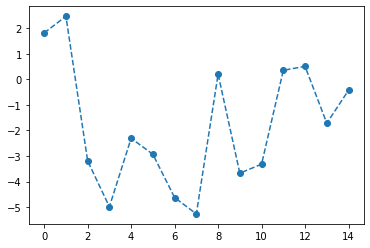

In [177]:
y = df['hours(R)'] - df['hours(Python)']
plt.plot(y,'--o')

`(6)` R과 Python의 학습량 차이를 ${\bf y}=(y_1,\dots,y_n)$라고 할때,
아래와 같은 변환을 이용하여
$\tilde{\bf y}=({\tilde{y}_1}, \dots, {\tilde{y}_n})$를 계산하라.

-   $\tilde{y}_1= \frac{1}{3}(2y_1 + y_2)$
-   $\tilde{y}_i= \frac{1}{3}(y_{i-1}+y_i+y_{i+1})$, for
    $i=2,3,\dots,n-1$
-   $\tilde{y}_n= \frac{1}{3}(y_{n-1}+2y_{n})$

결과를 시각화하라.

(풀이)

In [196]:
n = len(y)
M = np.array([abs(i-j)<2 for i in range(n) for j in range(n)]).reshape(n,n)/3
M[0,0] = 2/3
M[-1,-1] = 2/3 

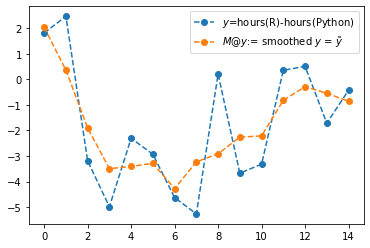

In [209]:
plt.plot(y,'--o',label=r'$y$=hours(R)-hours(Python)')
plt.plot(M@y,'--o',label=r'$M@y$:= smoothed $y$ = $\tilde{y}$')
plt.legend()